In [2]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [46]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [4]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [ ]:
path = input_file_directory + "/mefs/mef_jc10/exp3"

In [53]:
%%time
# DL data ATG7 isoform expression
red_path = '/jc10_exp3_red.csv'
green_path = '/jc10_exp3_green.csv'

df_aggregates = pandas.read_csv(path+red_path, sep = ";")
df_aggregates.iloc[:,1:] = df_aggregates.iloc[:,1:].apply(lambda x: x.str.replace(',','.'))
df_aggregates.iloc[:,1:] = df_aggregates.iloc[:,1:].apply(pandas.to_numeric, errors='coerce', axis=1)


df_monomeric= pandas.read_csv(path+green_path, sep = ";")
df_monomeric.iloc[:,1:] = df_monomeric.iloc[:,1:].apply(lambda x: x.str.replace(',','.'))
df_monomeric.iloc[:,1:] = df_monomeric.iloc[:,1:].apply(pandas.to_numeric, errors='coerce', axis=1)


print(df_aggregates, '\n', df_monomeric)

   conditions     wt     ev     evd   iso1   iso2
0   DMSO+FCCP  8.997  8.507   8.819  9.118  8.724
1   DMSO+FCCP  8.593  9.075   8.676  8.561  9.111
2   DMSO+FCCP  8.645  8.458  20.144  8.662  8.895
3   DMSO+FCCP  9.028  8.801   8.876  8.762  8.716
4    BAF+FCCP  9.266  8.838    8.71  9.157  8.638
5    BAF+FCCP  9.246  8.442   8.902  9.131  8.621
6    BAF+FCCP  9.197  8.842   8.564  9.052  8.638
7    BAF+FCCP  9.234  8.588   8.933  8.814  8.956
8        DMEM  8.798  8.488   6.345    NaN    NaN
9        DMEM  8.209    8.4   6.747    NaN    NaN
10       DMEM  8.498  8.402   6.465    NaN    NaN
11       DMEM  8.494  8.621    6.29    NaN    NaN 
    conditions      wt      ev     evd    iso1    iso2
0   DMSO+FCCP  23.823  20.364   21.65  20.885  21.462
1   DMSO+FCCP  20.947  20.396  21.307  21.487  22.757
2   DMSO+FCCP  21.648  20.689  58.479  20.656  21.199
3   DMSO+FCCP  20.765  20.449   22.07  21.264  20.577
4    BAF+FCCP  21.405  21.981   22.39  22.998  22.082
5    BAF+FCCP  20.726  2

In [37]:
#create dataframe for ratio
df_ratio = df = pandas.DataFrame()
df_ratio = df_ratio.assign(conditions = df_monomeric['conditions'],
                           normal= df_monomeric['wt'] / df_aggregates['wt'],
                           ev= df_monomeric['ev'] / df_aggregates['ev'],
                           ev_dox= df_monomeric['evd'] / df_aggregates['evd'],
                           wt1= df_monomeric['iso1'] / df_aggregates['iso1'],
                           wt2= df_monomeric['iso2'] / df_aggregates['iso2'] )
    
df_ratio

,conditions,normal,ev,ev_dox,wt1,wt2
0,DMSO+FCCP,2.64788,2.39379,2.45493,2.29052,2.46011
1,DMSO+FCCP,2.43768,2.24749,2.45586,2.50987,2.49775
2,DMSO+FCCP,2.50411,2.44609,2.90305,2.38467,2.38325
3,DMSO+FCCP,2.30007,2.32349,2.48648,2.42684,2.36083
4,BAF+FCCP,2.31006,2.4871,2.57061,2.51152,2.55638
5,BAF+FCCP,2.24162,2.51078,2.44046,2.42504,2.49797
6,BAF+FCCP,2.32859,2.43327,2.64444,2.55645,2.58555
7,BAF+FCCP,2.38109,2.45086,2.44688,2.48627,2.45578
8,DMEM,2.37008,2.31221,2.11836,NaN,NaN
9,DMEM,2.41321,2.48345,2.07811,NaN,NaN


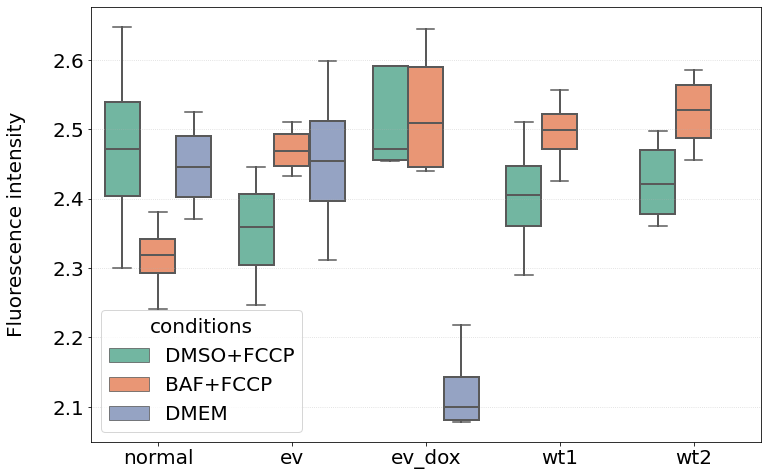

In [49]:
df_boxplot = df_ratio.melt(id_vars=["conditions"], var_name="cell lines")

#graph with BAF or DMSO treatment separatly to have a better view of the cell lines
seaborn.boxplot(x="cell lines", y="value", hue = 'conditions', palette = 'Set2', data = df_boxplot,
                boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2},
                showcaps=True, showfliers=False)

plt.ylabel('Fluorescence intensity\n')
plt.xlabel('')
plt.title('', x=.55)
print()

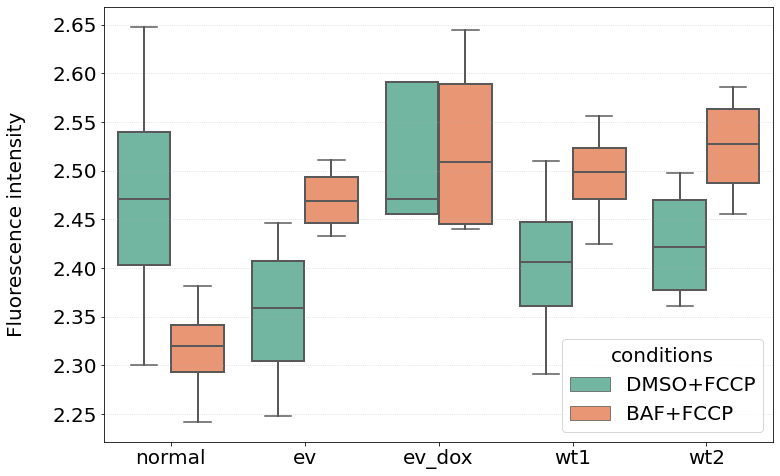

In [51]:
#without control
df_ratio_noclt = df_ratio[~df_ratio["conditions"].str.contains('DMEM')]

#melt wide to long
df_boxplot = df_ratio_noclt.melt(id_vars=["conditions"], var_name="cell lines")

#graph with BAF or DMSO treatment separatly to have a better view of the cell lines
seaborn.boxplot(x="cell lines", y="value", hue = 'conditions', palette = 'Set2', data = df_boxplot,
                boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2},
                showcaps=True, showfliers=False)

plt.ylabel('Fluorescence intensity\n')
plt.xlabel('')
plt.title('', x=.55)
print()